On veut :
- Une liste de requetes d'images de differentes zones geographiques.
- Nombre limite par orbite
- Contrainte de visibilite
- Contrainte de memoire
- Contrainte de dispo de station

- Creneaux -> var temporelle
- 1 tache par satellite
- 1 tache par station sol
- precedence -> telechargement apres la prise d'image
- maximiser la somme des priorites de taches

Mission activities:
- Payload Operations (sensor to collect data)
- Bus Operations (maintening status of satellite)
- Communicastions Operations (Trasmitting data to the station)

Sensor satellite

- Set of ressources
- start time
- duration of each task

- Tasks are the activities and operations to be performed
- Resources are the people, satellites, sensors, communication channels,...
- Events are used to capture domain-specific occurrences that restrict when tasks can be scheduled
- Constraints are further restrictions on when tasks can be scheduled that are due to interactions with other tasks or to resource capacity and availability

https://www2.cs.sfu.ca/CourseCentral/827/havens/papers/topic%2312(SatelliteScheduling)/dimacs98.pdf#:~:text=We%20view%20this%20scheduling%20task,scheduling

scheduled task = (task, {ressource set}, start time, duration)

Constraints:
- Task
- Resource
- Event

In [49]:
import random
import random
from ortools.sat.python import cp_model

def generate_feasible_data(num_zones, num_satellites, num_stations, num_tasks):
    # Generate zones
    geographical_zones = {}
    for z in range(num_zones):
        x_min = random.uniform(5, 15) + z * 10
        y_min = random.uniform(10, 20) + z * 10
        width = random.uniform(5, 10)
        height = random.uniform(5, 10)
        geographical_zones[z] = {
            'name': f'Zone {chr(65+z)}',
            'lower_left': (x_min, y_min),
            'upper_right': (x_min + width, y_min + height)
        }

    # Each zone have at least a satellite and a station and a tasks
    satellites = {}
    ground_stations = {}
    imaging_tasks_data = []

    for z in range(num_zones):
        # Satellites
        satellites[z] = {
            'name': f'Satellite {z+1}',
            'avail': (0, random.randint(200, 300)),
            'mem_cap': random.randint(100, 200),
            'max_per_orbit': random.randint(3, 6),
            'orbit_period': (0, 300),
            'zone': z,
            'position': (
                random.uniform(geographical_zones[z]['lower_left'][0], geographical_zones[z]['upper_right'][0]),
                random.uniform(geographical_zones[z]['lower_left'][1], geographical_zones[z]['upper_right'][1])
            )
        }

        # Stations
        ground_stations[z] = {
            'name': f'Station {z+1}',
            'avail': (0, random.randint(250, 400)),
            'zone': z,
            'position': (
                random.uniform(geographical_zones[z]['lower_left'][0], geographical_zones[z]['upper_right'][0]),
                random.uniform(geographical_zones[z]['lower_left'][1], geographical_zones[z]['upper_right'][1])
            )
        }

        # Tasks
        duration = random.randint(10, 30)
        visib_start = random.randint(0, 100)
        visib_end = visib_start + random.randint(40, 100)
        mem = random.randint(10, 50)
        imaging_tasks_data.append({
            'duration': duration,
            'visib': (visib_start, visib_end),
            'mem': mem,
            'priority': random.randint(5, 15),
            'zone': z
        })

    # More satellites
    for s in range(num_zones, num_satellites):
        zone_id = random.randint(0, num_zones - 1)
        satellites[s] = {
            'name': f'Satellite {s+1}',
            'avail': (0, random.randint(200, 300)),
            'mem_cap': random.randint(100, 200),
            'max_per_orbit': random.randint(3, 6),
            'orbit_period': (0, 300),
            'zone': zone_id,
            'position': (
                random.uniform(geographical_zones[zone_id]['lower_left'][0], geographical_zones[zone_id]['upper_right'][0]),
                random.uniform(geographical_zones[zone_id]['lower_left'][1], geographical_zones[zone_id]['upper_right'][1])
            )
        }

    # More stations
    for g in range(num_zones, num_stations):
        zone_id = random.randint(0, num_zones - 1)
        ground_stations[g] = {
            'name': f'Station {g+1}',
            'avail': (0, random.randint(250, 400)),
            'zone': zone_id,
            'position': (
                random.uniform(geographical_zones[zone_id]['lower_left'][0], geographical_zones[zone_id]['upper_right'][0]),
                random.uniform(geographical_zones[zone_id]['lower_left'][1], geographical_zones[zone_id]['upper_right'][1])
            )
        }

    # More tasks
    for t in range(num_zones, num_tasks):
        zone_id = random.randint(0, num_zones - 1)
        duration = random.randint(10, 30)
        visib_start = random.randint(0, 100)
        visib_end = visib_start + random.randint(40, 100)
        mem = random.randint(10, 50)
        imaging_tasks_data.append({
            'duration': duration,
            'visib': (visib_start, visib_end),
            'mem': mem,
            'priority': random.randint(5, 15),
            'zone': zone_id
        })

    return geographical_zones, satellites, ground_stations, imaging_tasks_data

num_zones = 5
num_satellites = 3
num_stations = 3
num_tasks = 20

geographical_zones, satellites, ground_stations, imaging_tasks_data = generate_feasible_data(
    num_zones, num_satellites, num_stations, num_tasks
)

geographical_zones, satellites, ground_stations, imaging_tasks_data

({0: {'name': 'Zone A',
   'lower_left': (12.320088962619305, 19.06890180341165),
   'upper_right': (21.635948058751225, 28.066201133949072)},
  1: {'name': 'Zone B',
   'lower_left': (22.508783984736866, 23.13316682653995),
   'upper_right': (30.187797152490695, 28.312950451662292)},
  2: {'name': 'Zone C',
   'lower_left': (27.491231452711276, 37.176067987253134),
   'upper_right': (35.62085058804565, 43.98156661758326)},
  3: {'name': 'Zone D',
   'lower_left': (41.32651046925052, 44.20262061171094),
   'upper_right': (49.207215408185114, 50.994525554637306)},
  4: {'name': 'Zone E',
   'lower_left': (53.62508175124575, 59.240389951940074),
   'upper_right': (60.87759057712022, 67.01186052964871)}},
 {0: {'name': 'Satellite 1',
   'avail': (0, 237),
   'mem_cap': 152,
   'max_per_orbit': 3,
   'orbit_period': (0, 300),
   'zone': 0,
   'position': (19.041383060112484, 21.334446818007354)},
  1: {'name': 'Satellite 2',
   'avail': (0, 245),
   'mem_cap': 183,
   'max_per_orbit': 5,
 

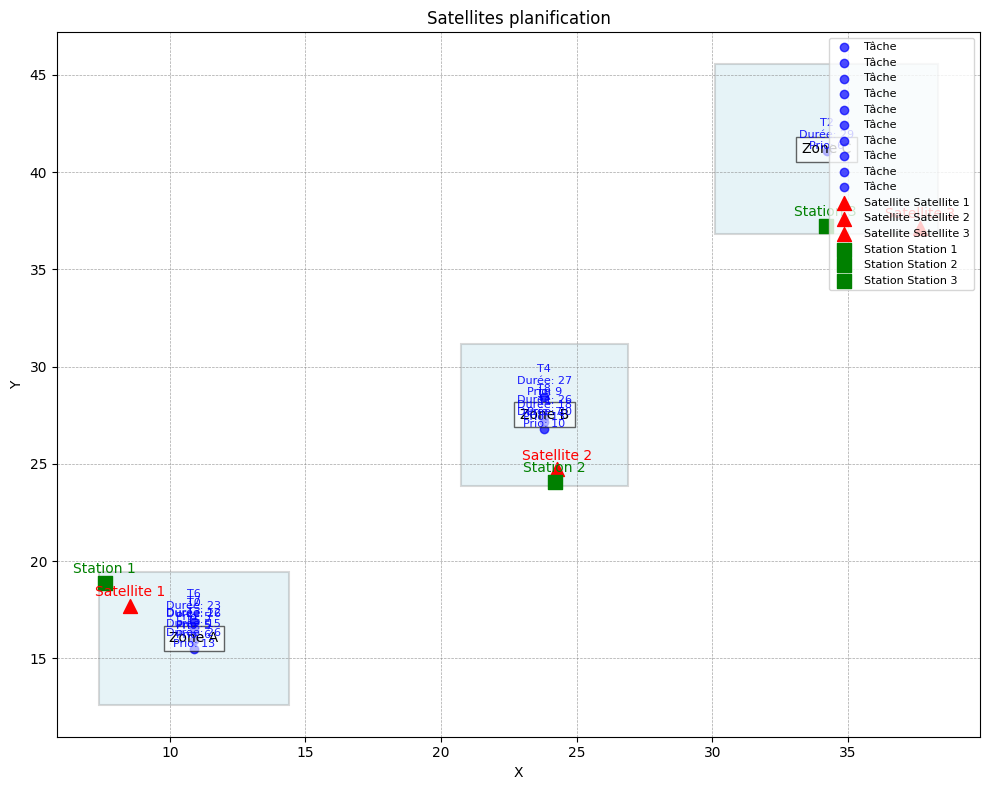

In [50]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_data(geographical_zones, satellites, ground_stations, imaging_tasks_data):
    fig, ax = plt.subplots(figsize=(10, 8))

    # Plot Zones
    for zone_id, zone in geographical_zones.items():
        ll = zone['lower_left']
        ur = zone['upper_right']
        width = ur[0] - ll[0]
        height = ur[1] - ll[1]
        rect = patches.Rectangle(ll, width, height, linewidth=1.5, edgecolor='gray', facecolor='lightblue', alpha=0.3)
        ax.add_patch(rect)
        ax.text(ll[0] + width / 2, ll[1] + height / 2, zone['name'], fontsize=10, color='black',
                ha='center', va='center', bbox=dict(facecolor='white', alpha=0.6))

    # Plot Tasks in Zones
    for task in imaging_tasks_data:
        zone_id = task['zone']
        zone = geographical_zones[zone_id]
        ll = zone['lower_left']
        ur = zone['upper_right']
        task_x = (ll[0] + ur[0]) / 2
        task_y = (ll[1] + ur[1]) / 2 + random.uniform(-1, 1)
        ax.scatter(task_x, task_y, color='blue', label='Tâche', alpha=0.7)
        ax.text(task_x, task_y, f"T{imaging_tasks_data.index(task)}\nDurée: {task['duration']}\nPrio: {task['priority']}",
                fontsize=8, ha='center', va='bottom', color='blue', alpha=0.9)

    # Plot satellites
    for sat_id, sat in satellites.items():
        pos = sat['position']
        ax.scatter(pos[0], pos[1], color='red', marker='^', s=100, label=f"Satellite {sat['name']}")
        ax.text(pos[0], pos[1] + 0.5, sat['name'], fontsize=10, ha='center', color='red')

    # Plot stations
    for station_id, station in ground_stations.items():
        pos = station['position']
        ax.scatter(pos[0], pos[1], color='green', marker='s', s=100, label=f"Station {station['name']}")
        ax.text(pos[0], pos[1] + 0.5, station['name'], fontsize=10, ha='center', color='green')

    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_title("Satellites planification")
    ax.legend(loc='upper right', fontsize=8)
    ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

num_zones = 3
num_satellites = 2
num_stations = 2
num_tasks = 10

geographical_zones, satellites, ground_stations, imaging_tasks_data = generate_feasible_data(
    num_zones, num_satellites, num_stations, num_tasks
)

plot_data(geographical_zones, satellites, ground_stations, imaging_tasks_data)


In [51]:
model = cp_model.CpModel()

# Zones as squares
# geographical_zones = {
#     0: {'name': 'Zone A', 'lower_left': (10.0, 20.0), 'upper_right': (15.0, 25.0)},
#     1: {'name': 'Zone B', 'lower_left': (15.0, 25.0), 'upper_right': (20.0, 30.0)}
# }

# Ressources
# satellites = {
#     0: {'name': 'S1', 'avail': (0, 200), 'mem_cap': 100, 'max_per_orbit': 3,
#         'orbit_period': (0, 200), 'zone': 0, 'position': (12.0, 22.0)},
#     1: {'name': 'S2', 'avail': (10, 220), 'mem_cap': 80, 'max_per_orbit': 2,
#         'orbit_period': (10, 220), 'zone': 1, 'position': (17.0, 27.0)}
# }
num_satellites = len(satellites)

# Stations
# ground_stations = {
#     0: {'name': 'G1', 'avail': (0, 300), 'zone': 0, 'position': (13.0, 23.0)},
#     1: {'name': 'G2', 'avail': (50, 250), 'zone': 1, 'position': (18.0, 28.0)}
# }
num_stations = len(ground_stations)

# Tasks
# imaging_tasks_data = [
#     {'duration': 15, 'visib': (5, 70),   'mem': 30, 'priority': 10, 'zone': 0},
#     {'duration': 20, 'visib': (10, 90),  'mem': 40, 'priority': 8,  'zone': 1},
#     {'duration': 10, 'visib': (30, 110), 'mem': 20, 'priority': 6,  'zone': 0},
#     {'duration': 25, 'visib': (50, 130), 'mem': 50, 'priority': 12, 'zone': 0},
#     {'duration': 15, 'visib': (80, 150), 'mem': 30, 'priority': 9,  'zone': 1},
# ]
num_imaging = len(imaging_tasks_data)


download_duration = 10

# Vars
imaging_tasks = {}
download_tasks = {}
imaging_intervals = [] # Between satellite and task
download_intervals = [] # Between satellite and station

# For each task:
# - An interval
# - A satellite affectation
# - 
for i, task in enumerate(imaging_tasks_data):
    dur = task['duration']
    visib_start, visib_end = task['visib']
    imaging_start = model.NewIntVar(visib_start, visib_end - dur, f"img_start_{i}")
    imaging_end   = model.NewIntVar(visib_start + dur, visib_end, f"img_end_{i}")
    img_active = model.NewBoolVar(f"img_active_{i}")
    interval = model.NewOptionalIntervalVar(imaging_start, dur, imaging_end, 
                                            img_active, f"img_interval_{i}")
    imaging_tasks[i] = {
        'start': imaging_start,
        'end': imaging_end,
        'interval': interval,
        'duration': dur,
        'mem': task['mem'],
        'priority': task['priority'],
        'zone': task['zone'],
        'sat': model.NewIntVar(0, num_satellites - 1, f"img_sat_{i}"),
        'active': img_active
    }
    imaging_intervals.append(interval)

    # Constraints on the imaging window depending on the availability of the satellite.
    for s in range(num_satellites):
        avail_start, avail_end = satellites[s]['avail']
        b = model.NewBoolVar(f"img_{i}_sat_{s}")
        model.Add(imaging_tasks[i]['sat'] == s).OnlyEnforceIf(b)
        model.Add(imaging_tasks[i]['sat'] != s).OnlyEnforceIf(b.Not())
        model.Add(imaging_start >= avail_start).OnlyEnforceIf(b)
        model.Add(imaging_end <= avail_end).OnlyEnforceIf(b)

    # Satellite in same zone as request
    for s in range(num_satellites):
        if satellites[s]['zone'] != task['zone']:
            model.Add(imaging_tasks[i]['sat'] != s)

# Download for each tasks
for i, task in enumerate(imaging_tasks_data):
    download_start = model.NewIntVar(0, 300, f"dl_start_{i}")
    download_end   = model.NewIntVar(0, 300, f"dl_end_{i}")
    dl_interval = model.NewOptionalIntervalVar(download_start, download_duration, 
                                                download_end,
                                                imaging_tasks[i]['active'],
                                                f"dl_interval_{i}")
    download_tasks[i] = {
        'start': download_start,
        'end': download_end,
        'interval': dl_interval,
        'duration': download_duration,
        'station': model.NewIntVar(0, num_stations - 1, f"dl_station_{i}")
    }
    download_intervals.append(dl_interval)
    # Precedence
    model.Add(imaging_tasks[i]['end'] <= download_start).OnlyEnforceIf(imaging_tasks[i]['active'])
    # Station in same zone as request
    for g in range(num_stations):
        if ground_stations[g]['zone'] != task['zone']:
            model.Add(download_tasks[i]['station'] != g)

# Ressources
# One image at a time
for s in range(num_satellites):
    sat_intervals = []
    for i in range(num_imaging):
        b = model.NewBoolVar(f"img_{i}_on_sat_{s}")
        model.Add(imaging_tasks[i]['sat'] == s).OnlyEnforceIf(b)
        model.Add(imaging_tasks[i]['sat'] != s).OnlyEnforceIf(b.Not())
        sat_intervals.append(imaging_tasks[i]['interval'])
    model.AddNoOverlap(sat_intervals)

# One download at a time
for g in range(num_stations):
    gs_intervals = []
    for i in range(num_imaging):
        b = model.NewBoolVar(f"dl_{i}_on_gs_{g}")
        model.Add(download_tasks[i]['station'] == g).OnlyEnforceIf(b)
        model.Add(download_tasks[i]['station'] != g).OnlyEnforceIf(b.Not())
        gs_intervals.append(download_tasks[i]['interval'])
    model.AddNoOverlap(gs_intervals)

# Nb by orbite
for s in range(num_satellites):
    orbit_start, orbit_end = satellites[s]['orbit_period']
    imaging_in_orbit = []
    for i in range(num_imaging):
        in_orbit = model.NewBoolVar(f"img_{i}_in_orbit_{s}")
        model.Add(imaging_tasks[i]['start'] >= orbit_start).OnlyEnforceIf(in_orbit)
        model.Add(imaging_tasks[i]['start'] < orbit_end).OnlyEnforceIf(in_orbit)
        imaging_in_orbit.append(in_orbit)
    model.Add(sum(imaging_in_orbit) <= satellites[s]['max_per_orbit'])

# Memory
for s in range(num_satellites):
    mem_consumption = []
    for i in range(num_imaging):
        b = model.NewBoolVar(f"img_{i}_mem_sat_{s}")
        model.Add(imaging_tasks[i]['sat'] == s).OnlyEnforceIf(b)
        model.Add(imaging_tasks[i]['sat'] != s).OnlyEnforceIf(b.Not())
        mem_consumption.append(imaging_tasks[i]['mem'] * b)
    model.Add(sum(mem_consumption) <= satellites[s]['mem_cap'])

# Maximize priority sums
objective_terms = []
for i in range(num_imaging):
    prio = imaging_tasks_data[i]['priority']
    objective_terms.append(prio * imaging_tasks[i]['active'])
model.Maximize(sum(objective_terms))

# Solve
solver = cp_model.CpSolver()
solver.parameters.max_time_in_seconds = 30.0
status = solver.Solve(model)

if status in (cp_model.OPTIMAL, cp_model.FEASIBLE):
    print("Solution :")
    total_priority = 0
    for i in range(num_imaging):
        if solver.Value(imaging_tasks[i]['active']):
            img_start = solver.Value(imaging_tasks[i]['start'])
            img_end   = solver.Value(imaging_tasks[i]['end'])
            sat     = solver.Value(imaging_tasks[i]['sat'])
            zone_id = imaging_tasks[i]['zone']
            zone_info = geographical_zones[zone_id]
            prio    = imaging_tasks_data[i]['priority']
            print(f"Image {i} on satellite {satellites[sat]['name']} (Zone: {zone_info['name']}) : {img_start} -> {img_end}")
            print(f"   Target Zone : {zone_info['name']} Coords : {zone_info['lower_left']} -> {zone_info['upper_right']}, priority {prio}")
            total_priority += prio
            dl_start = solver.Value(download_tasks[i]['start'])
            dl_end   = solver.Value(download_tasks[i]['end'])
            station = solver.Value(download_tasks[i]['station'])
            print(f"   Download on station {ground_stations[station]['name']} (Zone {ground_stations[station]['zone']}): {dl_start} -> {dl_end}")
    print(f"total_priority: {total_priority}")
else:
    print("No solutions")

Solution :
Image 1 on satellite Satellite 2 (Zone: Zone B) : 121 -> 141
   Target Zone : Zone B Coords : (20.74704701370191, 23.873554150455142) -> (26.877461095360538, 31.170111465556424), priority 10
   Download on station Station 2 (Zone 1): 141 -> 151
Image 2 on satellite Satellite 3 (Zone: Zone C) : 92 -> 121
   Target Zone : Zone C Coords : (30.11920506840235, 36.81390385847569) -> (38.327434362657435, 45.532942295813186), priority 6
   Download on station Station 3 (Zone 2): 121 -> 131
Image 4 on satellite Satellite 2 (Zone: Zone B) : 53 -> 80
   Target Zone : Zone B Coords : (20.74704701370191, 23.873554150455142) -> (26.877461095360538, 31.170111465556424), priority 9
   Download on station Station 2 (Zone 1): 80 -> 90
Image 5 on satellite Satellite 1 (Zone: Zone A) : 1 -> 27
   Target Zone : Zone A Coords : (7.382710958153092, 12.62170841018002) -> (14.37861208505974, 19.46525233963988), priority 13
   Download on station Station 1 (Zone 0): 27 -> 37
Image 7 on satellite Sate